## Gather

In [67]:
import pandas as pd
import numpy as np

In [68]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

* I use the requests library to retrieve the tweet images predictions file from Udacity, then save the file and open it via pandas into a dataframe

In [69]:
import requests

In [70]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [71]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [72]:
# Twitter API Gathering code 
# I was unable to get an API key from twitter, 
# so I ended up using the Udacity provided file 'tweet_json.txt'

# Commented out since it just fails a bunch of times at it loops throught since I have no API access
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

"""

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_

## Assess

* Now I move on to examing the tweet archive data

In [73]:
import json

In [74]:
# List of dicts to read JSON data line by line and convert to DataFrame
dict_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        try:
            text = json.loads(line)
            dict_list.append(text)
        except JSONDecodeError:
            print(json.JsonDecodeError.msg)
            continue

df_raw = pd.DataFrame(dict_list, columns = list(dict_list[0].keys()))

In [75]:
df = df_raw[['id', 'retweet_count', 'favorite_count', 'created_at']]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [77]:
len(df_1)

2356

#### Make a copy of the files in order to protect the original data

In [78]:
tweet_data_cln = df.copy()
image_predictions_cln = image_predictions.copy()
dog_data_cln = df_1.copy()

In [79]:
tweet_data_cln.sample(10)

,id,retweet_count,favorite_count,created_at
554,803692223237865472,8689,0,Tue Nov 29 20:08:52 +0000 2016
1114,732585889486888962,868,4016,Tue May 17 14:57:41 +0000 2016
731,781524693396357120,6426,23163,Thu Sep 29 16:03:01 +0000 2016
1923,674063288070742018,2450,6769,Tue Dec 08 03:09:46 +0000 2015
1423,697943111201378304,776,2638,Fri Feb 12 00:39:39 +0000 2016
2184,668981893510119424,340,573,Tue Nov 24 02:38:07 +0000 2015
617,796177847564038144,16628,0,Wed Nov 09 02:29:25 +0000 2016
1302,707411934438625280,673,2486,Wed Mar 09 03:45:22 +0000 2016
213,851464819735769094,7855,25944,Mon Apr 10 16:00:07 +0000 2017
2295,667073648344346624,134,425,Wed Nov 18 20:15:26 +0000 2015


In [80]:
tweet_data_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [81]:
image_predictions_cln.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True


In [82]:
image_predictions_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [83]:
dog_data_cln.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
768,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514...,12,10,Derek,None,None,None,None
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167...,12,10,Jimothy,None,None,None,None
1226,713919462244790272,NaN,NaN,2016-03-27 02:43:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kanu. He's a Freckled Ticonderoga. Sim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713919462...,12,10,Kanu,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11,10,a,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None


In [84]:
dog_data_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### After an inspection of the data the following data issues were identified for cleaning

#### Quality (8 min)

##### `multiple` tables
~~- erroneous data types (datetime columns are strings)~~

##### `tweet_data_cln` table
~~- favorite count / retweet count is sometimes 0 (extremely unlikely)~~  

~~- incorrect column name (id vs tweet_id)~~

##### `image_predictions_cln` table
~~- not all dog breed predictions are capitalized as they should be~~


##### `dog_data_cln` table
~~- some rows are retweets (don't want these)~~

~~- some rows are data that is in reply to another tweet~~



~~- rating numerator outlier (very high or 0)~~

~~- convert "dog stage" column to categorical data~~

~~- excess columns (retweet columns, in_reply columns)~~


#### Tidiness (2 min)

##### `multiple` tables
~~- Join the DataFrames on the "tweet_id" column~~

##### `dog_data_cln` table
~~- "dog stage" e.g. doggo, fluffer, pupper, puppo variables should be 1 column (melt?)~~






In [156]:
dog_data_cln[dog_data_cln.rating_numerator < 10].count()

tweet_id              418
timestamp             418
source                418
text                  418
expanded_urls         418
rating_numerator      418
rating_denominator    418
name                  418
dog_type              418
dtype: int64

#### Define

Convert datetime columns into datetime type rather than "object" (string) type

#### Code

In [86]:
tweet_data_cln['created_at'].dtypes

dtype('O')

In [87]:
dog_data_cln['timestamp'].dtypes

dtype('O')

In [88]:
tweet_data_cln['created_at'] = pd.to_datetime(tweet_data_cln['created_at'])
dog_data_cln['timestamp'] = pd.to_datetime(dog_data_cln['timestamp'])

#### Test

In [89]:
tweet_data_cln.dtypes

id                         int64
retweet_count              int64
favorite_count             int64
created_at        datetime64[ns]
dtype: object

In [90]:
dog_data_cln.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Define
Adjusting tweet_data_cln table by renaming the 'id' column to match the other dataframes 'tweet_id' column 

#### Code

In [91]:
tweet_data_cln.sample()

,id,retweet_count,favorite_count,created_at
1017,746790600704425984,1806,5345,2016-06-25 19:42:08


In [92]:
tweet_data_cln = tweet_data_cln.rename(columns={'id': 'tweet_id'})

#### Test

In [93]:
tweet_data_cln.sample()

,tweet_id,retweet_count,favorite_count,created_at
410,823269594223824897,11421,0,2017-01-22 20:42:21


#### Successfully renamed the 'id' column in this table to match the equivalent column in the other tables so that we can do a join later

#### Define

The odd favorite amounts and retweet amounts need cleaning by dropping

#### Code

In [94]:
# check to see how many rows have 0 as the favorite amount, very 
# unlikely given the size of this twitter account
len(tweet_data_cln[tweet_data_cln['favorite_count'] == 0])

179

In [95]:
tweet_data_cln.shape

(2354, 4)

In [96]:
# Given that relatively few rows of the dataset have no data for the
# favorite count I think that we can safely drop these values since I
# have no real way of finding this missing data

In [97]:
tweet_data_cln = tweet_data_cln.drop(tweet_data_cln[tweet_data_cln['favorite_count'] == 0].index)

#### Test
For favorite count

In [98]:
tweet_data_cln.shape

(2175, 4)

In [99]:
# Perform the same check as above only for the retweet count rather 
# than the favorite count
len(tweet_data_cln[tweet_data_cln['retweet_count'] == 0])

1

In [100]:
tweet_data_cln = tweet_data_cln.drop(tweet_data_cln[tweet_data_cln['retweet_count'] == 0].index)

#### Test
For retweet count

In [101]:
tweet_data_cln.shape

(2174, 4)

#### Define
Next we will capitalize the dog breed names in the image_predictions_cln table so that they all use the same format

#### Code

In [102]:
image_predictions_cln.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True


In [103]:
image_predictions_cln['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [104]:
image_predictions_cln['p1'] = image_predictions_cln['p1'].str.capitalize()

In [105]:
image_predictions_cln['p2'] = image_predictions_cln['p2'].str.capitalize()

In [106]:
image_predictions_cln['p3'] = image_predictions_cln['p3'].str.capitalize()

#### Test

In [107]:
image_predictions_cln[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
2050,Mexican_hairless,Sea_lion,Weimaraner
1406,Boston_bull,American_staffordshire_terrier,Staffordshire_bullterrier
829,Malamute,Siberian_husky,Eskimo_dog
224,Irish_terrier,Briard,Soft-coated_wheaten_terrier
253,Wood_rabbit,Tabby,Egyptian_cat


In [108]:
dog_data_cln.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None


##### Define
The `dog_data_cln` table has some values in it that are actually retweets, since we only want to use data from the WeRateDogs official twitter, we will need to drop these rows

##### Code

In [109]:
dog_data_cln.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848324959...,12,10,Odin,None,None,None,None


In [110]:
dog_data_cln['retweeted_status_id'].isnull().sum()

2175

In [111]:
len(dog_data_cln['retweeted_status_id'])

2356

In [112]:
# Pull out and keep the values where the retweet_status_id is null
dog_data_cln = dog_data_cln[pd.isnull(dog_data_cln['retweeted_status_id'])]

#### Test

In [113]:
# Make sure it is the correct length
len(dog_data_cln['retweeted_status_id'])

2175

##### Define
The `dog_data_cln` table still has some rows that are not original to the WeRateDogs twitter, so I am going to drop the tweets that are in reply by using the same method as above

##### Code

In [114]:
dog_data_cln['in_reply_to_status_id'].isnull().sum()

2097

In [115]:
len(dog_data_cln['in_reply_to_status_id'])

2175

In [116]:
# Pull out and keep the values where the in_reply_status_id is null
dog_data_cln = dog_data_cln[pd.isnull(dog_data_cln['in_reply_to_status_id'])]

#### Test

In [117]:
len(dog_data_cln['in_reply_to_status_id'])

2097

##### Define
The `dog_data_cln` table has a bunch of extra columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and the "dog status" rows need to be melted together since they are categorical data for measuring the same thing)

##### Code

In [118]:
dog_data_cln.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1529,690248561355657216,NaN,NaN,2016-01-21 19:04:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690248561...,11,10,Maxwell,None,None,None,None


In [119]:
# Drop excess columns to make dealing with this table easier in the future
dog_data_cln = dog_data_cln.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                                 'retweeted_status_timestamp'], axis=1)

In [120]:
dog_data_cln.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
288,838476387338051585,2017-03-05 19:48:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,None,None,None,None


In [121]:
dog_data_cln = pd.melt(dog_data_cln, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
                               'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

#### Test 

In [122]:
dog_data_cln.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,dog_type
3792,673705679337693185,2015-12-07 03:28:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,https://twitter.com/dog_rates/status/673705679...,8,10,Dot,floofer,None


In [123]:
dog_data_cln['dog_type'].value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_type, dtype: int64

#### Define
Sort the dataframe by dog type so that we can drop duplicates that have no type.

#### Code

In [124]:
# Sort the dataframe by dog type so that we can drop duplicates that have no type.
dog_data_cln = dog_data_cln.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [125]:
dog_data_cln.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,dog_type
3580,680130881361686529,2015-12-24 21:00:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,floofer,None


In [126]:
# Drop the excess column
dog_data_cln = dog_data_cln.drop(['types'], axis=1)

In [127]:
dog_data_cln.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
5960,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,pupper


#### Test

In [128]:
dog_data_cln['dog_type'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

#### Define
Convert the "dog_type" column from string to categorical to more closely reflect the type of data that it is

#### Code

In [129]:
dog_data_cln['dog_type'].dtypes

dtype('O')

In [130]:
dog_data_cln['dog_type'] = dog_data_cln['dog_type'].astype('category')

#### Test

In [131]:
dog_data_cln['dog_type'].dtypes

CategoricalDtype(categories=['None', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

#### Define
Due to the fact that these numerators are above 20, and there are relatively few of them, I am going to drop them

#### Code

In [132]:
len(dog_data_cln.loc[(dog_data_cln['rating_numerator'] > 20)])

18

In [133]:
dog_data_cln = dog_data_cln[dog_data_cln['rating_numerator'] < 20]

#### Test

In [134]:
dog_data_cln.shape

(2079, 9)

#### Define
Check if there are numerators that are negative or that equal 0

#### Code

In [135]:
len(dog_data_cln.loc[(dog_data_cln['rating_numerator'] <= 0)])

1

In [136]:
dog_data_cln.loc[(dog_data_cln['rating_numerator'] <= 0)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2343,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None


In [137]:
dog_data_cln = dog_data_cln.loc[(dog_data_cln['rating_numerator'] != 0)]

#### Test

In [138]:
dog_data_cln.shape

(2078, 9)

#### Checking the number of rows that each data set has 

In [139]:
dog_data_cln.shape

(2078, 9)

In [140]:
tweet_data_cln.shape

(2174, 4)

In [141]:
image_predictions_cln.shape

(2075, 12)

#### Define
Join the dataframes together so that I can produce a visualization and some insights

#### Code

In [142]:
joined_df = tweet_data_cln.merge(dog_data_cln, how='left', on='tweet_id')

In [143]:
joined_df.sample()

,tweet_id,retweet_count,favorite_count,created_at,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1612,677334615166730240,328,1477,2015-12-17 03:48:51,2015-12-17 03:48:51,"<a href=""http://twitter.com/download/iphone"" r...",This dog gave up mid jump. 9/10 https://t.co/K...,https://twitter.com/dog_rates/status/677334615...,9.0,10.0,None,None


In [144]:
twitter_archive_master = joined_df.merge(image_predictions_cln, how='left', on='tweet_id')

In [145]:
twitter_archive_master.sample()

,tweet_id,retweet_count,favorite_count,created_at,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1781,673359818736984064,728,1558,2015-12-06 04:34:25,2015-12-06 04:34:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,https://twitter.com/dog_rates/status/673359818...,8.0,10.0,...,1.0,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True


#### Test

In [146]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 23 columns):
tweet_id              2174 non-null int64
retweet_count         2174 non-null int64
favorite_count        2174 non-null int64
created_at            2174 non-null datetime64[ns]
timestamp             2078 non-null datetime64[ns]
source                2078 non-null object
text                  2078 non-null object
expanded_urls         2075 non-null object
rating_numerator      2078 non-null float64
rating_denominator    2078 non-null float64
name                  2078 non-null object
dog_type              2078 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3           

## Insights and visualization section

Many people have heard of the dog rating twitter account "WeRateDogs" which is well known for its rating dogs above 10 and for assigning dogs into four distinct categories. These categories are based on common cutesy slang for referring to different types of dog. For this project we are going to examine some interesting insights from the data of this twitter archive. 

First we are going to look at which type of dogs typically get the highest average rating:

#### Examine the dog type that recieved the highest ratings

In [147]:
grouped_dog = twitter_archive_master.groupby('dog_type')['rating_numerator'].mean()
grouped_dog = grouped_dog.sort_values(ascending=False)
grouped_dog

dog_type
puppo      12.041667
doggo      11.847222
floofer    11.800000
pupper     10.746725
None       10.503729
Name: rating_numerator, dtype: float64

##### Insight 
We can suggest from the fact that the "puppo" category has the highest mean rating that the person rating the dogs, prefers dogs in that category slightly more than in the other categories, although concluding that might be kind of against the spirit of the twitter account. Additionally, we can see that the dogs that were not assigned any category received slightly lower average ratings. From this we might conclude that the person behind the account favours dog types that they can categorize easily.

Next we are going to look at the results of the dog breed Neural Network prediction model, and see which breeds are most common and received the highest average rating (based on the predicted breed).

#### Examine the most commonly predicted dog breed and the dog breed with the highest rating

In [148]:
twitter_archive_master['p1'].value_counts()[:10]

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: p1, dtype: int64

In [149]:
# groups the dataset by predicted dog breed and gets the average rating for each group
group_breed = twitter_archive_master.groupby('p1')['rating_numerator'].mean()

# filters out predicted dog breeds that appear less than 10 times
group_breed = group_breed[twitter_archive_master['p1'].value_counts() > 10].sort_values(ascending=False)
group_breed

p1
Web_site                          12.214286
Eskimo_dog                        11.777778
Samoyed                           11.700000
Chow                              11.609756
Golden_retriever                  11.548148
Cardigan                          11.529412
Great_pyrenees                    11.461538
Kelpie                            11.454545
Pembroke                          11.443182
Siberian_husky                    11.315789
Cocker_spaniel                    11.296296
French_bulldog                    11.269231
Pomeranian                        11.189189
Rottweiler                        11.187500
Pekinese                          11.153846
Basset                            11.153846
Labrador_retriever                11.131868
Toy_poodle                        11.054054
American_staffordshire_terrier    11.000000
Kuvasz                            11.000000
German_shepherd                   11.000000
Old_english_sheepdog              10.909091
Malamute                     

##### Insight
From this examination, we can see that Golden Retriever's seem to be the most common breed of dog submitted for rating, or that the Neural Network is biased towards predicted that breed for some reason. We can also see another piece of data that should be cleaned from the average rating by breed, we see that "Web Site" is the top rated dog breed. We obviously know that this is an error, and move onto the next highest which is the "Eskimo Dog". We can suggest that the rater likes this type of dog the best or perhaps suggest since it is an unusual dog, they rate them highly because they haven't seen many of them.

Next we are going to look and see what dog type gets the most favorites on average.

#### Examine which dog type gets the most favorites on average

In [150]:
favorite_group = twitter_archive_master.groupby(['dog_type'])['favorite_count'].mean().sort_values(ascending=False)
favorite_group

dog_type
puppo      22715.125000
doggo      18060.194444
floofer    11674.900000
None        8627.256454
pupper      7461.096070
Name: favorite_count, dtype: float64

##### Insight
We can see that the "puppo" dog type gets more favorites on average than the other types of dog, which is interesting in that it also matches up with the dog type that gets higher ratings on average. Perhaps we could conclude that people in general enjoy this type of dog, and not just the person behind the ratings on the twitter account. Of course it could also be that people are more likely to favorite a dog with a high rating than with a lower rating.

#### Produce a visualization
In order to furthur illustrate some of these insights, we will take a look at a few visualizations of these numbers. First we can see via a bar chart which dog type gets the most favorites. Second we will see which dog breed gets the highest ratings on average via another bar chart (without the "Web Site" category though). Then we will visit the  number of dogs per breed data with a pie chart, so that we can see how much of the total dogs are comprised of each individual breed.

In [151]:
import matplotlib.pyplot as plt

In [152]:
df_fav = favorite_group.to_frame()
df_fav

,favorite_count
dog_type,
puppo,22715.125000
doggo,18060.194444
floofer,11674.900000
None,8627.256454
pupper,7461.096070


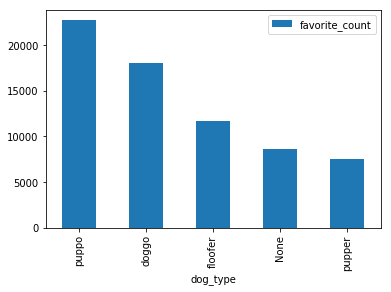

In [153]:
df_fav.plot.bar();

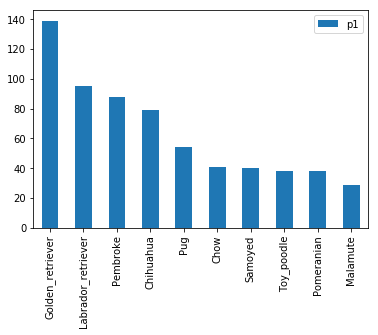

In [154]:
scatter_df = twitter_archive_master['p1'].value_counts()[:10].to_frame()
scatter_df.plot.bar();

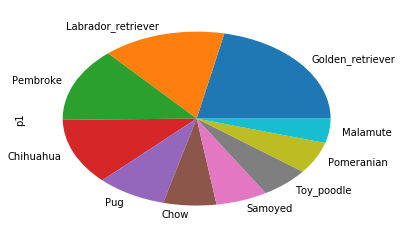

In [155]:
twitter_archive_master['p1'].value_counts()[:10].plot.pie();